# About Practice Problem: Loan Prediction III

This hackathon aims to provide a professional setup to showcase your skills and compete with their peers, learn new things and achieve a steep learning curve.



## About Company

Dream Housing Finance company deals in all home loans. They have presence across all urban, semi urban and rural areas. Customer first apply for home loan after that company validates the customer eligibility for loan.

## Problem

Company wants to automate the loan eligibility process (real time) based on customer detail provided while filling online application form. These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.2

### Note: 

    Evaluation Metric is accuracy i.e. percentage of loan approval you correctly predict.
    You are expected to upload the solution in the format of "sample_submission.csv"

In [1]:
#importing the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Quick Data Exploration

## Reading the dataset

Reading the dataset in a dataframe using Pandas

printing the first five rows of the dataset

In [2]:
train = pd.read_csv('Data/train.csv')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


## describe() function

Get the numerical variables of the dataset

describe() function would provide count, mean, standard deviation (std), min, quartiles and max in its output


    LoanAmount has (614 – 592) 22 missing values.
    Loan_Amount_Term has (614 – 600) 14 missing values.
    Credit_History has (614 – 564) 50 missing values.
    We can also look that about 84% applicants have a credit_history. How? The mean of Credit_History field is 0.84 (Remember, Credit_History has value 1 for those who have a credit history and 0 otherwise)
    The ApplicantIncome distribution seems to be in line with expectation. Same with CoapplicantIncome
    
Please note that we can get an idea of a possible skew in the data by comparing the mean to the median, i.e. the 50% figure.

In [3]:
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


For the non-numerical values (e.g. Property_Area, Credit_History etc.), we can look at frequency distribution to understand whether they make sense or not. The frequency table can be printed by following command:

In [4]:
train['Property_Area'].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

Similarly, we can look at unique values of port of credit history. 

Note that dfname['column_name'] is a basic indexing technique to acess a particular column of the dataframe. 
It can be a list of columns as well. 

In [5]:
train.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

# Distribution Analysis

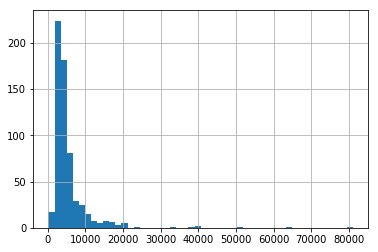

In [6]:
#plotting the histogram of ApplicantIncome 
train['ApplicantIncome'].hist(bins=50)

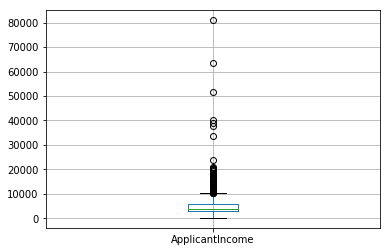

In [7]:
# Box plot for ApplicantIncome
train.boxplot(column = 'ApplicantIncome')

 This confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels

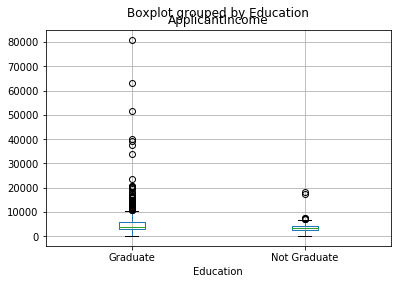

In [8]:
train.boxplot(column = 'ApplicantIncome', by = 'Education')

We can see that there is no substantial different between the mean income of graduate and non-graduates. But there are a higher number of graduates with very high incomes, which are appearing to be the outliers.

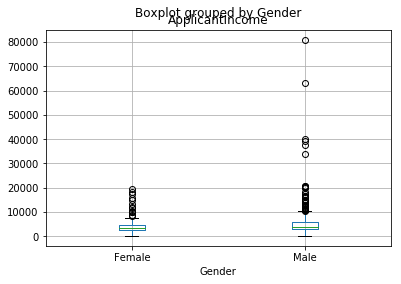

In [9]:
train.boxplot(column = 'ApplicantIncome', by = 'Gender')

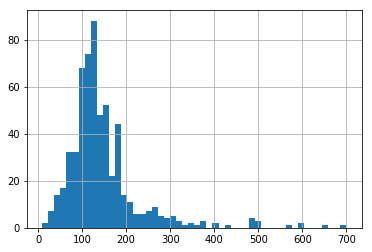

In [10]:
train['LoanAmount'].hist(bins=50)

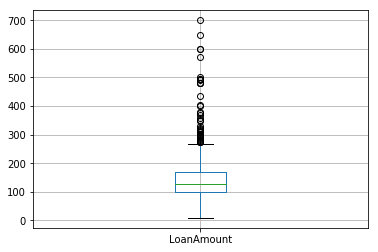

In [11]:
train.boxplot(column = 'LoanAmount')

## Categorical Variable Analysis

using pivot table

In [12]:
tempA = train['Credit_History'].value_counts(ascending=True)
temp1 = train.pivot_table(values = 'Loan_Status',index = ['Credit_History'],aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Credit History: ')
print(tempA)
print('\n Probability of getting a loan for each Credit History class: ')
print(temp1)

Frequency Table for Credit History: 
0.0     89
1.0    475
Name: Credit_History, dtype: int64

 Probability of getting a loan for each Credit History class: 
                Loan_Status
Credit_History             
0.0                0.078652
1.0                0.795789


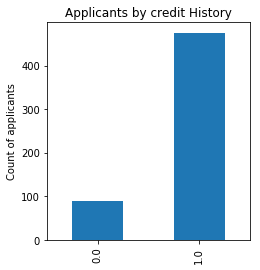

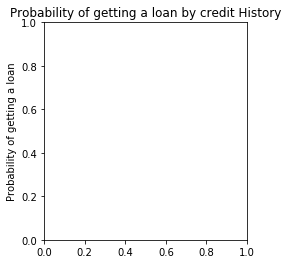

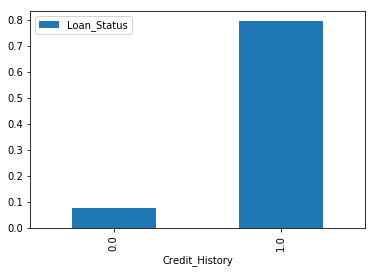

In [13]:
#plotting the pivot table
fig = plt.figure(figsize = (8,4))
axA = fig.add_subplot(121)
axA.set_label('Credit_History')
axA.set_ylabel('Count of applicants')
axA.set_title('Applicants by credit History')
tempA.plot(kind = 'bar')

fig = plt.figure(figsize = (8,4))
ax1 = fig.add_subplot(122)
ax1.set_label('Credit_History')
ax1.set_ylabel('Probability of getting a loan')
ax1.set_title('Probability of getting a loan by credit History')
temp1.plot(kind = 'bar')

 This shows that the chances of getting a loan are eight-fold if the applicant has a valid credit history

In [14]:
piv1 = train['Married'].value_counts(ascending=True)
piv2 = train.pivot_table(values = 'Loan_Status',index = ['Married'],aggfunc=lambda x: x.map({'Y':1, 'N':0}).mean())
print('Frequency Table for Married: ')
print(piv1)
print('\n Probability of getting a loan for each Credit History class: ')
print(piv2)

Frequency Table for Married: 
No     213
Yes    398
Name: Married, dtype: int64

 Probability of getting a loan for each Credit History class: 
         Loan_Status
Married             
No          0.629108
Yes         0.716080


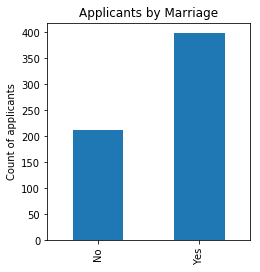

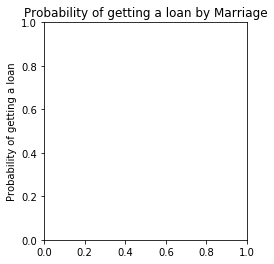

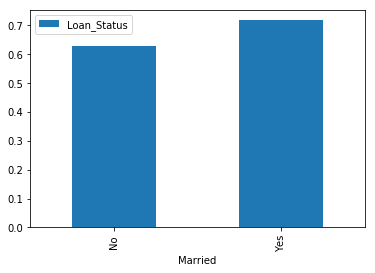

In [15]:
fig = plt.figure(figsize = (8,4))
axi = fig.add_subplot(121)
axi.set_label('Married')
axi.set_ylabel('Count of applicants')
axi.set_title('Applicants by Marriage')
piv1.plot(kind = 'bar')

fig = plt.figure(figsize = (8,4))
axa = fig.add_subplot(122)
axa.set_label('Married')
axa.set_ylabel('Probability of getting a loan')
axa.set_title('Probability of getting a loan by Marriage')
piv2.plot(kind = 'bar')

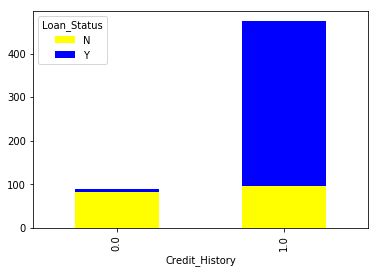

In [16]:
tempC = pd.crosstab(train['Credit_History'], train['Loan_Status'])
tempC.plot(kind = 'bar', stacked = True, color = ['yellow', 'blue'], grid = False)

We have just created two basic classification algorithms here, one based on credit history, while other on 2 categorical variables (including gender). 

# Data Munging in Python

Here is the reasons for the need:

    There are missing values in some variables. We should estimate those values wisely depending on the amount of missing values and the expected importance of variables.
    While looking at the distributions, we saw that ApplicantIncome and LoanAmount seemed to contain extreme values at either end. Though they might make intuitive sense, but should be treated appropriately.

In [17]:
#Checking missing values in all the variables

train.apply(lambda x: sum(x.isnull()))

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

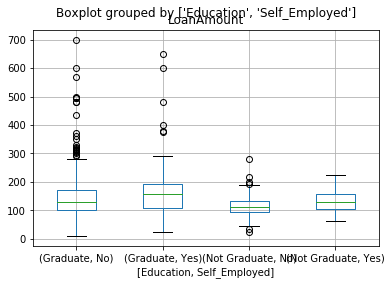

In [18]:
train.boxplot(column = 'LoanAmount', by =[ 'Education','Self_Employed'])

In [19]:
#we have to ensure that each of Self_Employed and Education variables should not have a missing values.
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [20]:
#Since ~86% values are "No", it is safe to impute the missing values as "No" as there is a high probability of success. 
train['Self_Employed'].fillna('No', inplace = True)

In [21]:

train['Education'].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [22]:
#Now, we will create a Pivot table, which provides us median values for all the groups of unique values of Self_Employed and Education features. Next, we define a function, which returns the values of these cells and apply it to fill the missing values of loan amount:
table = train.pivot_table(values = 'LoanAmount', index='Self_Employed', columns='Education', aggfunc = np.median)
#define a function to return value of this pivot table
def medFunc(x):
    return table.loc[x['Self_Employed'],x['Education']]
#replace missing values
train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(medFunc, axis=1), inplace = True)
#train['LoanAmount'].fillna(train[train['LoanAmount'].isnull()].apply(medFunc, axis=1), inplace=True)

## Outliers

How to treat for extreme values in distribution of LoanAmount and ApplicantIncome?

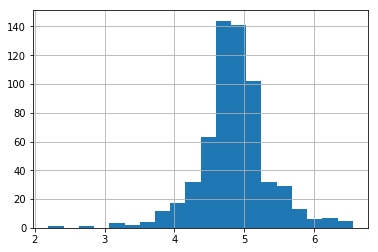

In [25]:
#Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let's try a log transformation to nullify their effect:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
train['LoanAmount_log'].hist(bins = 20)

Since the extreme values are practically possible, i.e. some people might apply for high value loans due to specific needs. So instead of treating them as outliers, let's try a log transformation to nullify their effect:

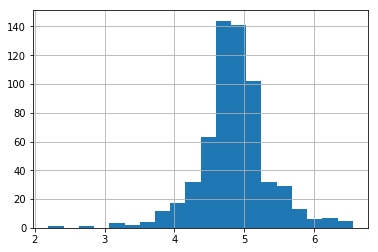

In [26]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']
train['TotalIncome_log'] = np.log(train['TotalIncome'])
train['LoanAmount_log'].hist(bins=20)

Coming to ApplicantIncome. One intuition can be that some applicants have lower income but strong support Co-applicants. So it might be a good idea to combine both incomes as total income and take a log transformation of the same.